#               BLACK FRIDAY SALE

## Dataset History

 A retail company " ABC Private Limited" wants to understand the customer purchase behaviour (specifically, purchase amount) against various categories. They have shared purchase summaries of varipous customers for selected high-volume products from last month. The dataset contains customer demographics (age, gender, marital status, city type, stayincurrentcity), product details (productid and product category), and Total purchase amount from the last month.


---

### DATA PROCESSING

In [68]:
#installation and loading of packages
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning) 
import pandas as pd
import numpy as np
import seaborn as sns

import matplotlib
import matplotlib.pyplot as plt


In [3]:
#read in the data file
df = pd.read_csv(r'C:\Users\geezi\Downloads\flipkart\train.csv')

In [4]:
#Lets have a quick view of the data

df.head()

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
0,1000001,P00069042,F,0-17,10,A,2,0,3,NaN,NaN,8370
1,1000001,P00248942,F,0-17,10,A,2,0,1,6.0,14.0,15200
2,1000001,P00087842,F,0-17,10,A,2,0,12,NaN,NaN,1422
3,1000001,P00085442,F,0-17,10,A,2,0,12,14.0,NaN,1057
4,1000002,P00285442,M,55+,16,C,4+,0,8,NaN,NaN,7969


---
### DATA CLEANING & TRANSFORMATION

In [5]:
#Lets check for any missing data

df.isna().sum()

User_ID                            0
Product_ID                         0
Gender                             0
Age                                0
Occupation                         0
City_Category                      0
Stay_In_Current_City_Years         0
Marital_Status                     0
Product_Category_1                 0
Product_Category_2            173638
Product_Category_3            383247
Purchase                           0
dtype: int64

69% of the data is missing in Product_Category_3, it will be better to drop the column.
31% of the data is missing in Product_Category_2 which is a smaller percentage, we will drop the missing rows

In [9]:
df.drop('Product_Category_3', inplace = True, axis = 1)

In [10]:
df.dropna(axis='rows')

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Purchase
1,1000001,P00248942,F,0-17,10,A,2,0,1,6.0,15200
3,1000001,P00085442,F,0-17,10,A,2,0,12,14.0,1057
5,1000003,P00193542,M,26-35,15,A,3,0,1,2.0,15227
6,1000004,P00184942,M,46-50,7,B,2,1,1,8.0,19215
7,1000004,P00346142,M,46-50,7,B,2,1,1,15.0,15854
...,...,...,...,...,...,...,...,...,...,...,...
545905,1006040,P00331042,M,26-35,6,B,2,0,5,8.0,7058
545906,1006040,P00101942,M,26-35,6,B,2,0,8,17.0,5948
545907,1006040,P00277642,M,26-35,6,B,2,0,2,3.0,3425
545908,1006040,P00127642,M,26-35,6,B,2,0,1,2.0,15694


In [11]:
#Lets check the datatypes for each column

df.dtypes

User_ID                         int64
Product_ID                     object
Gender                         object
Age                            object
Occupation                      int64
City_Category                  object
Stay_In_Current_City_Years     object
Marital_Status                  int64
Product_Category_1              int64
Product_Category_2            float64
Purchase                        int64
dtype: object

In [12]:
# Change the datatypes

df['marital_status'] = df['Marital_Status'].astype(bool)

In [15]:
#Removing duplicates

df.drop_duplicates(inplace = True)

In [16]:
#Lets get the info of the dataframe
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 550068 entries, 0 to 550067
Data columns (total 12 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   User_ID                     550068 non-null  int64  
 1   Product_ID                  550068 non-null  object 
 2   Gender                      550068 non-null  object 
 3   Age                         550068 non-null  object 
 4   Occupation                  550068 non-null  int64  
 5   City_Category               550068 non-null  object 
 6   Stay_In_Current_City_Years  550068 non-null  object 
 7   Marital_Status              550068 non-null  int64  
 8   Product_Category_1          550068 non-null  int64  
 9   Product_Category_2          376430 non-null  float64
 10  Purchase                    550068 non-null  int64  
 11  marital_status              550068 non-null  bool   
dtypes: bool(1), float64(1), int64(5), object(5)
memory usage: 50.9+ MB


In [17]:
#Dropping missinmg values
df.dropna(inplace = True)


In [18]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 376430 entries, 1 to 545914
Data columns (total 12 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   User_ID                     376430 non-null  int64  
 1   Product_ID                  376430 non-null  object 
 2   Gender                      376430 non-null  object 
 3   Age                         376430 non-null  object 
 4   Occupation                  376430 non-null  int64  
 5   City_Category               376430 non-null  object 
 6   Stay_In_Current_City_Years  376430 non-null  object 
 7   Marital_Status              376430 non-null  int64  
 8   Product_Category_1          376430 non-null  int64  
 9   Product_Category_2          376430 non-null  float64
 10  Purchase                    376430 non-null  int64  
 11  marital_status              376430 non-null  bool   
dtypes: bool(1), float64(1), int64(5), object(5)
memory usage: 34.8+ MB


---
### PURCHASE DISTRIBUTION

In [22]:
plt.style.use('fivethirtyeight')

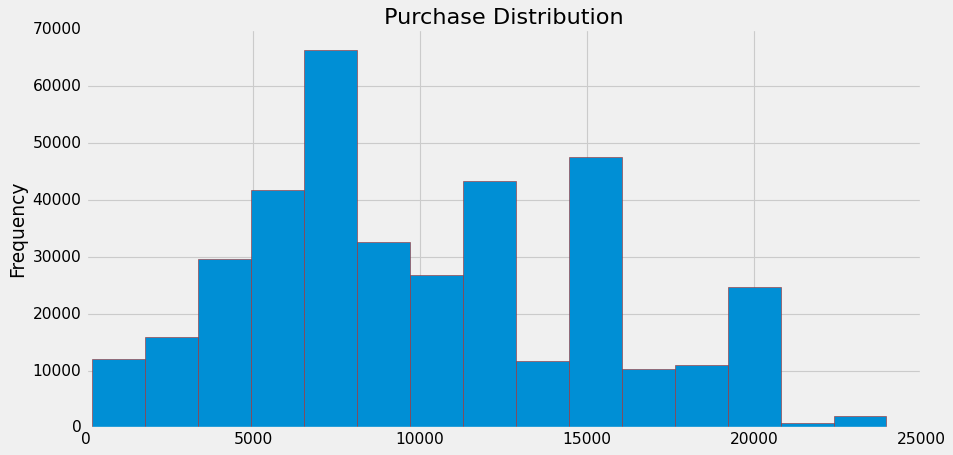

In [23]:
# A histogram is best for visualizing distribution
purchase_ds = df['Purchase'].plot(kind='hist',bins=15, 
       edgecolor = 'brown',figsize=(12,6),title='Purchase Distribution')

Most of the purchases made are between 5k to 10k.

*Are there Outliers?* 
An outlier is an observation that lies outside the overall pattern of a distribution. In this Histogram the point on the far right above 20000 is an outlier.

---
### PURCHASES BY AGE GROUP

<AxesSubplot: ylabel='Age'>

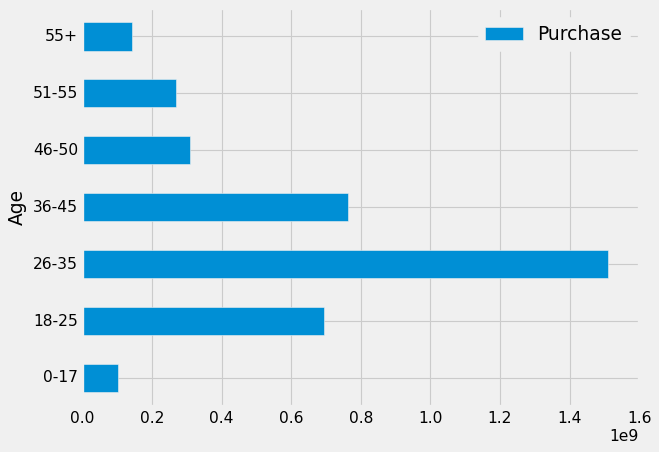

In [27]:
age_by_pu = df[['Age','Purchase']].groupby('Age').sum()

age_by_pu.plot(kind='barh')

Age group 26-35 made the most purchase while ages 0-17 made the least purchase.

---
### PURCHASES BY GENDER

array([<AxesSubplot: ylabel='Purchase'>], dtype=object)

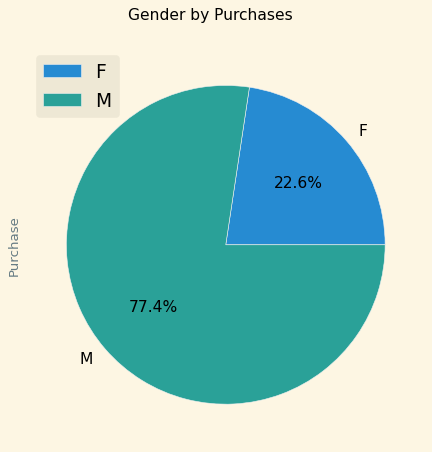

In [35]:
gender_by_pu=df[['Gender','Purchase']].groupby('Gender').sum()

gender_by_pu.plot(kind='pie',autopct='%1.1f%%',subplots = True, figsize=(13,6),title='Gender by Purchases')

The Male gender accounts for 77.4% of the purchases made

---
### PURCHASES BY MARITAL STATUS

array([<AxesSubplot: ylabel='Purchase'>], dtype=object)

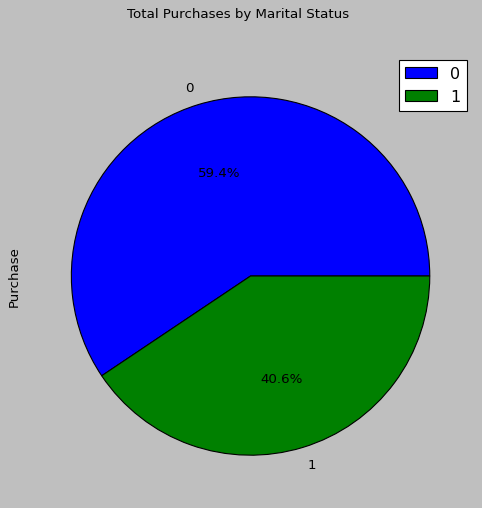

In [44]:
marital_by_pu=df[['Marital_Status','Purchase']].groupby('Marital_Status').sum()

marital_by_pu.plot(kind='pie',title='Total Purchases by Marital Status',autopct='%1.1f%%',subplots=True,figsize=(12,7))

1 - Married
0 - Single

The Single group makes up 59.4% of the purchases made while the married group makes up a lesser 40.6%.

---
### PURCHASES BY CITY

array([<AxesSubplot: title={'center': 'Purchase'}, xlabel='City'>],
      dtype=object)

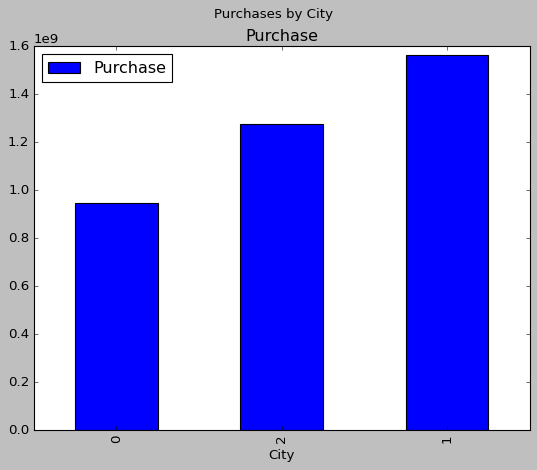

In [67]:
city_by_pu=df[['City_Category','Purchase']].groupby('City_Category').sum()
city_by_pu=city_by_pu.sort_values(by='Purchase') #sort by the purchase

plt.style.use('classic')
city_by_pu.plot(kind='bar', xlabel='City', subplots=True,title='Purchases by City')

The City category **B** has the highest purchases while A had the least.

---
### TOP 10 SELLING PRODUCTS

<AxesSubplot: ylabel='Product_ID'>

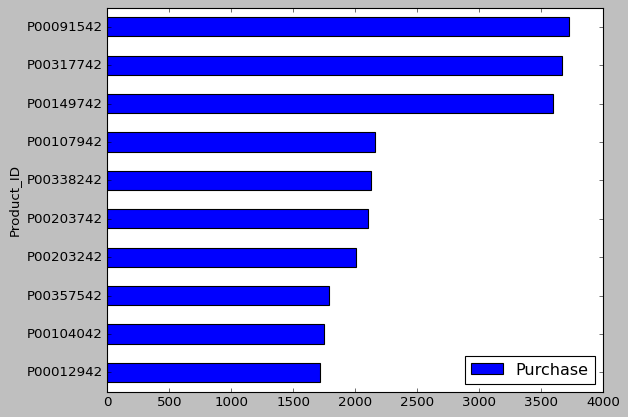

In [46]:
top_10=df[['Product_ID','Purchase']].groupby('Product_ID').sum()
top_10=top_10.sort_values(by='Purchase',ascending=True)
top_10=top_10.head(10)

#creating the plot
top_10.plot(kind='barh')

The top 3 products are heavily purchased leaving a huge margin between other products. 

---
### CUSTOMER PURCHASE OVER THE YEARS

<AxesSubplot: title={'center': 'Purchases by Customers over the years'}, xlabel='Years'>

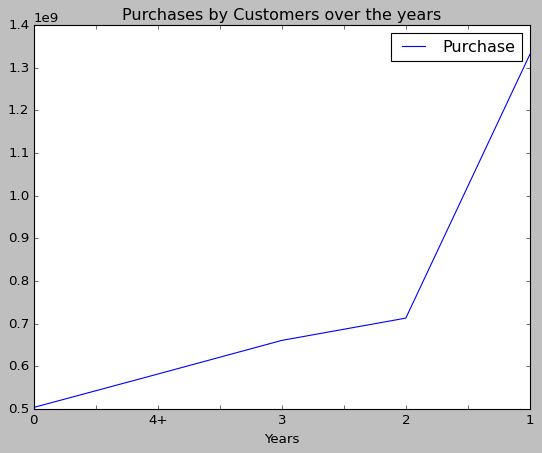

In [51]:
city_dur=df[['Stay_In_Current_City_Years','Purchase']].groupby('Stay_In_Current_City_Years').sum()
city_dur=city_dur.sort_values(by='Purchase')
city_dur.plot(kind="line",xlabel='Years',title='Purchases by Customers over the years')

We can see that during customers first year in the city, purchases were highest but after their first year there is a sharp decline in purchases made as the years goes by. The customers might have found a better alternative. 

---
## DATA CORRELATION


### Correlation shows the relationship between two variables.
Taking a deep dive to understand certain variables that have a relationship with the **Purchase**, *what exactly are these?*

In [59]:
#We need to change to a numeric datatype to get the correlation between these variables
df_numerize = df

for col_num in df_numerize.columns:
    if(df_numerize[col_num].dtype == 'object'):
        df_numerize[col_num] = df_numerize[col_num].astype('category')
        df_numerize[col_num] = df_numerize[col_num].cat.codes
        
df_numerize

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Purchase,marital_status
1,1000001,1229,0,0,10,0,2,0,1,6.0,15200,False
3,1000001,416,0,0,10,0,2,0,12,14.0,1057,False
5,1000003,958,1,2,15,0,3,0,1,2.0,15227,False
6,1000004,889,1,4,7,1,2,1,1,8.0,19215,True
7,1000004,1646,1,4,7,1,2,1,1,15.0,15854,True
...,...,...,...,...,...,...,...,...,...,...,...,...
545905,1006040,1574,1,2,6,1,2,0,5,8.0,7058,False
545906,1006040,471,1,2,6,1,2,0,8,17.0,5948,False
545907,1006040,1364,1,2,6,1,2,0,2,3.0,3425,False
545908,1006040,592,1,2,6,1,2,0,1,2.0,15694,False


In [65]:
df_numerize = df_numerize.drop(columns=['marital_status']) #dropping the marital_status created earlier as a bool datatype

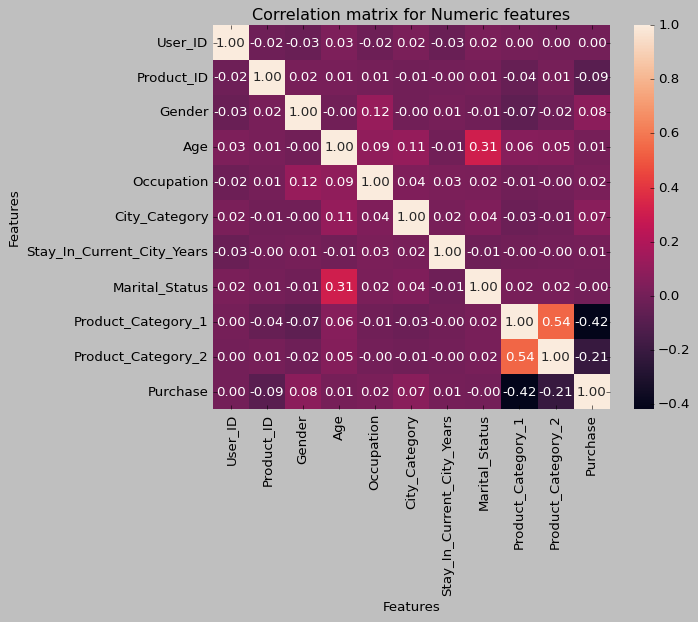

In [66]:
#correlation heatmap for these numeric features

correlation_matrix = df_numerize.corr(method='pearson')

sns.heatmap(correlation_matrix, annot=True, fmt= '.2f')

plt.xlabel('Features')
plt.ylabel('Features')
plt.title('Correlation matrix for Numeric features')

plt.show()

#### Observation:
-  Product_Category_1 and Product_Category_2 has a significant relationship
-  The Age of the customers are slightly correlated to their marital status
-  The Product_Category_1 has a strong negative relatiosnhip with the Purchases, it seems customers are not interested in this product.
-  No feature has a strong relationship with the Purchase made, this is possible due to the fact this is a Black friday sales data.
